In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# creating companies dataframe
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
# creating companies dataframe
rounds2 = pd.read_csv("rounds2.csv", encoding="ISO-8859-1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
# Converting 'permalink' values to lowercase
companies['permalink'] = companies['permalink'].str.lower()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
# Renaming 'company_permalink' column to 'permalink' column
rounds2.rename(columns={'company_permalink':'permalink'}, inplace=True)

# Converting 'permalink' values to lowercase
rounds2['permalink'] = rounds2['permalink'].str.lower()

rounds2.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
# unique companies are present in rounds2?
len(companies['permalink'].unique().tolist())

66368

In [7]:
len(rounds2['permalink'].unique().tolist())

66370

In [8]:
# Merging Comapanies and Rounds Dataframes to create Master Frame
master_frame = pd.merge(rounds2, companies, how='inner', on='permalink')
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [9]:
master_frame.shape

(114942, 15)

In [10]:
master_frame.info()
master_frame.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 15 columns):
permalink                  114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


,raised_amount_usd
count,9.495800e+04
mean,1.042696e+07
std,1.148218e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680521e+06
75%,7.000000e+06
max,2.127194e+10


In [11]:
# calculating percentage of missing values (column-wise) to perform cleaning
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [12]:
# Removing funding_round_code column
master_frame = master_frame.drop('funding_round_code', axis=1)

# Removing funding_round_code column
master_frame = master_frame.drop('founded_at', axis=1)

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
dtype: float64

In [13]:
# calculating percentage of rows with more than 5 null values
100*(len(master_frame[master_frame.isnull().sum(axis=1) > 5].index) / len(master_frame.index))

1.375476327191105

In [14]:
# Removing rows with more than 5 null values
master_frame = master_frame[master_frame.isnull().sum(axis=1) <= 5]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          16.40
name                        0.00
homepage_url                4.68
category_list               1.77
status                      0.00
country_code                6.26
state_code                  8.26
region                      7.57
city                        7.57
dtype: float64

In [15]:
# Removing rows whose 'raised_amount_usd' value is nan, since it is one of the crucial column for analysis
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
homepage_url               4.37
category_list              0.90
status                     0.00
country_code               5.97
state_code                 7.82
region                     7.23
city                       7.23
dtype: float64

In [16]:
# Removing rows whose 'country_code' value is null
master_frame = master_frame[~pd.isnull(master_frame['country_code'])]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
homepage_url               3.79
category_list              0.65
status                     0.00
country_code               0.00
state_code                 1.97
region                     1.34
city                       1.34
dtype: float64

In [17]:
# Removing rows whose 'category_list' value is null
master_frame = master_frame[~pd.isnull(master_frame['category_list'])]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
homepage_url               3.67
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

In [18]:
# converting 'raised_amount_usd' value into Millions
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd'].apply(lambda x: x/1000000)
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.00000,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.70000,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.00000,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,0.04125,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,0.04336,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver


In [19]:
# grouping master_frame based on'funding_round_type'
funding_type_segement = master_frame.groupby('funding_round_type')
funding_type_segement.raised_amount_usd.mean().sort_values(ascending = False)

funding_round_type
post_ipo_debt            169.451790
secondary_market          84.438532
private_equity            73.938486
post_ipo_equity           66.077059
debt_financing            17.167653
undisclosed               15.891661
venture                   11.724223
grant                      4.512698
product_crowdfunding       1.353227
convertible_note           1.337187
angel                      0.971574
seed                       0.747794
equity_crowdfunding        0.509898
non_equity_assistance      0.480753
Name: raised_amount_usd, dtype: float64

In [20]:
master_frame.describe()

,raised_amount_usd
count,88529.000000
mean,10.473850
std,111.811808
min,0.000000
25%,0.370518
50%,1.800000
75%,7.100000
max,21271.935000


In [ ]:
# import wikipedia as wp
   
# #Get the html source
# html = wp.page("List of territorial entities where English is an official language").html().encode("UTF-8")
# df = pd.read_html(html)[1]
# df.to_csv('EnglishSpeakingCountries.csv',header=0,index=False)
# print (df)

In [35]:
# grouping based on 'country_code' with cumulative sum of 'raised_amount_usd'
country_investment_df = pd.DataFrame(master_frame.groupby('country_code').raised_amount_usd.sum())

# slicing top 9 countries with most 'raised_amount_usd'
top9 = country_investment_df.sort_values(by ='raised_amount_usd', ascending = False).iloc[0:9, :]
top9.iloc[:,:]

,raised_amount_usd
country_code,
USA,665782.068320
CHN,75207.065796
GBR,32436.812830
IND,27383.831560
CAN,18304.117219
RUS,11277.449213
DEU,9970.512161
ISR,9655.727871
FRA,9022.653438


In [30]:
top9.head()

,raised_amount_usd
country_code,
USA,665782.068320
CHN,75207.065796
GBR,32436.812830
IND,27383.831560
CAN,18304.117219


In [49]:
# Creating sector mapping dataframe
sector_mapping = pd.read_csv("mapping.csv")
sector_mapping.set_index('category_list', inplace = True)
sector_mapping.head()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
category_list,,,,,,,,,
NaN,0,1,0,0,0,0,0,0,0
3D,0,0,0,0,0,1,0,0,0
3D Printing,0,0,0,0,0,1,0,0,0
3D Technology,0,0,0,0,0,1,0,0,0
Accounting,0,0,0,0,0,0,0,0,1


In [50]:
categoryMapping_df = pd.get_dummies(sector_mapping).idxmax(1).reset_index().rename(columns={0:'main_sector'})
categoryMapping_df.head()

,category_list,main_sector
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


In [51]:
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.00000,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.70000,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.00000,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,0.04125,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,0.04336,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver


In [52]:
# Create a function to be applied
def filterCategoryValue(x):
    cid = x.split('|')
    return cid[0]

filteredCategoryValue = filterCategoryValue('Application Platforms|Real Time|Social Network...')
print(filteredCategoryValue)

# Create a new column
master_frame['primary_sector'] = master_frame['category_list'].apply(filterCategoryValue)
master_frame.head()

Application Platforms


,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.00000,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Media
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.70000,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,Application Platforms
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.00000,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,0.04125,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,Games
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,0.04336,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology


In [53]:
master_frame.shape
#master_frame = pd.merge(rounds2, companies, how='inner', on='permalink')
# master_frame = pd.merge(rounds2, companies, on='permalink')
# master_frame.head()

(88529, 14)

In [54]:
final_master_frame = pd.merge(master_frame, categoryMapping_df, how='inner', on='category_list')
final_master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5.000000,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,Media,Entertainment
2,/organization/anthill-magazine,/funding-round/52128cd405b88f36a85d6cded8359f1c,seed,09-04-2015,0.600000,Anthill Magazine,http://anthillonline.com/,Media,operating,AUS,7,Melbourne,Melbourne,Media,Entertainment
3,/organization/basel-switzerland,/funding-round/ae3c2e82851d1fd6f4ba59ee6d3f0eb2,venture,07-01-2002,13.439178,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,Media,Entertainment
4,/organization/basel-switzerland,/funding-round/b6403185d64ae92299ad625c9d99b05d,venture,05-08-2005,55.464142,The Speedel Group,http://www.speedelgroup.com/,Media,closed,CHE,4,Basel,Basel,Media,Entertainment


In [55]:
final_master_frame.shape

(39766, 15)

In [56]:
final_master_frame.columns

Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'funded_at', 'raised_amount_usd', 'name', 'homepage_url',
       'category_list', 'status', 'country_code', 'state_code', 'region',
       'city', 'primary_sector', 'main_sector'],
      dtype='object')

In [82]:
final_master_frame.primary_sector

0                            Media
1                            Media
2                            Media
3                            Media
4                            Media
5                            Media
6                            Media
7                            Media
8                            Media
9                            Media
10                           Media
11                           Media
12                           Media
13                           Media
14                           Media
15                           Media
16                           Media
17                           Media
18                           Media
19                           Media
20                           Media
21                           Media
22                           Media
23                     Curated Web
24                     Curated Web
25                     Curated Web
26                     Curated Web
27                     Curated Web
28                  

In [83]:
final_master_frame.main_sector

0                                  Entertainment
1                                  Entertainment
2                                  Entertainment
3                                  Entertainment
4                                  Entertainment
5                                  Entertainment
6                                  Entertainment
7                                  Entertainment
8                                  Entertainment
9                                  Entertainment
10                                 Entertainment
11                                 Entertainment
12                                 Entertainment
13                                 Entertainment
14                                 Entertainment
15                                 Entertainment
16                                 Entertainment
17                                 Entertainment
18                                 Entertainment
19                                 Entertainment
20                  

In [ ]:
usa_df = final_master_frame.loc[final_master_frame.country_code == 'USA']
usa_df.shape
usa_df.describe()

In [ ]:
great_britain_df = final_master_frame.loc[final_master_frame.country_code == 'GBR']
great_britain_df.shape
great_britain_df.describe()

In [ ]:
india_df = final_master_frame.loc[final_master_frame.country_code == 'IND']
india_df.shape
india_df.describe()

In [ ]:
usa_df.raised_amount_usd.sum()

In [ ]:
great_britain_df.raised_amount_usd.sum()

In [ ]:
india_df.raised_amount_usd.sum()

In [ ]:
usaInvestmentsBySectors = pd.DataFrame(usa_df.groupby('main_sector').raised_amount_usd.sum())
usaInvestmentsBySectors.sort_values(by ='raised_amount_usd', ascending = False)

In [ ]:
gbrInvestmentsBySectors = pd.DataFrame(great_britain_df.groupby('main_sector').raised_amount_usd.sum())
gbrInvestmentsBySectors.sort_values(by ='raised_amount_usd', ascending = False)

In [ ]:
indiaInvestmentsBySectors = pd.DataFrame(india_df.groupby('main_sector').raised_amount_usd.sum())
indiaInvestmentsBySectors.sort_values(by ='raised_amount_usd', ascending = False)

In [ ]:
usaInvestmentsBySectors = usa_df.groupby('main_sector')
usaInvestmentsBySectors.describe()

In [ ]:
gbrInvestmentsBySectors = great_britain_df.groupby('main_sector')
gbrInvestmentsBySectors.describe()

In [ ]:
indiaInvestmentsBySectors = india_df.groupby('main_sector')
indiaInvestmentsBySectors.describe()

In [ ]:
usa_others_df = usa_df.loc[usa_df.main_sector == 'Others']
usa_others_df.sort_values(by ='raised_amount_usd', ascending = False)

In [ ]:
usa_cleantech_semiconductors_df = usa_df.loc[usa_df.main_sector == 'Cleantech / Semiconductors']
usa_cleantech_semiconductors_df.sort_values(by ='raised_amount_usd', ascending = False)

In [ ]:
gbr_others_df = great_britain_df.loc[great_britain_df.main_sector == 'Others']
gbr_others_df.sort_values(by ='raised_amount_usd', ascending = False)

In [ ]:
gbr_social_finance_analytics_advertising_df = great_britain_df.loc[great_britain_df.main_sector == 'Social, Finance, Analytics, Advertising']
gbr_social_finance_analytics_advertising_df.sort_values(by ='raised_amount_usd', ascending = False)

In [ ]:
india_others_df = india_df.loc[india_df.main_sector == 'Others']
india_others_df.sort_values(by ='raised_amount_usd', ascending = False)

In [ ]:
india_news_search_messaging_df = india_df.loc[india_df.main_sector == 'News, Search and Messaging']
india_news_search_messaging_df.sort_values(by ='raised_amount_usd', ascending = False)

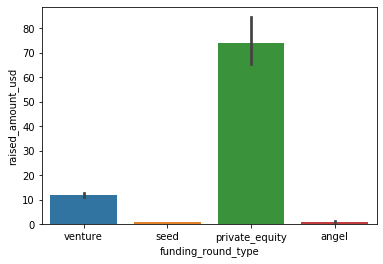

In [24]:
plot1_df = master_frame.loc[(master_frame.funding_round_type == 'venture') | (master_frame.funding_round_type == 'angel') | (master_frame.funding_round_type == 'seed') | (master_frame.funding_round_type == 'private_equity'), :]
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=plot1_df)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

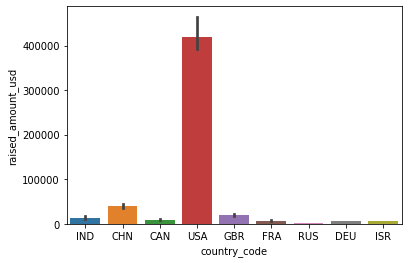

In [41]:
top9_countries = ['USA', 'CHN', 'GBR', 'IND', 'CAN', 'RUS', 'DEU', 'ISR', 'FRA']
plot2_df = master_frame.loc[(master_frame.funding_round_type == 'venture') & master_frame['country_code'].isin(top9_countries), :]
sns.barplot(x='country_code', y='raised_amount_usd', data=plot2_df, estimator=np.sum)
plt.show


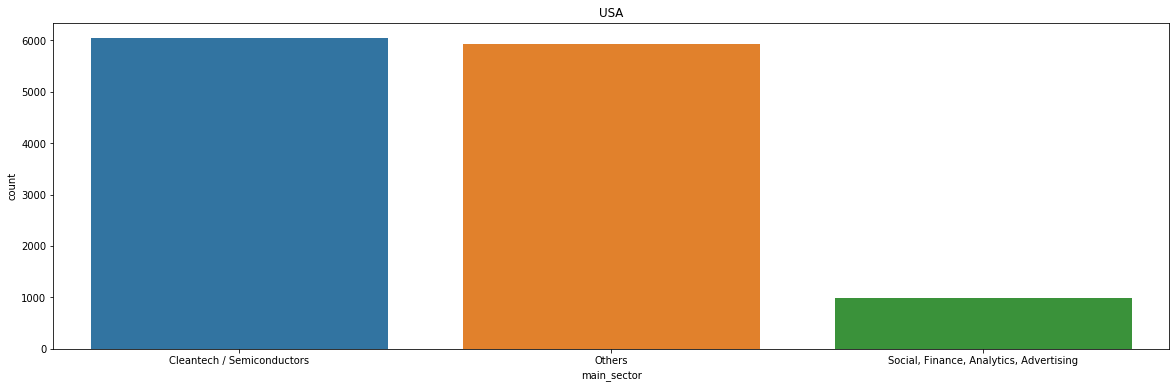

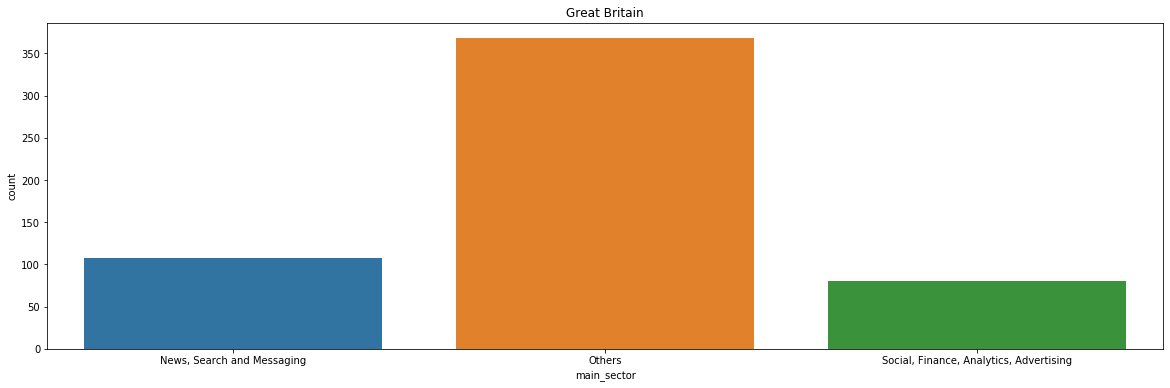

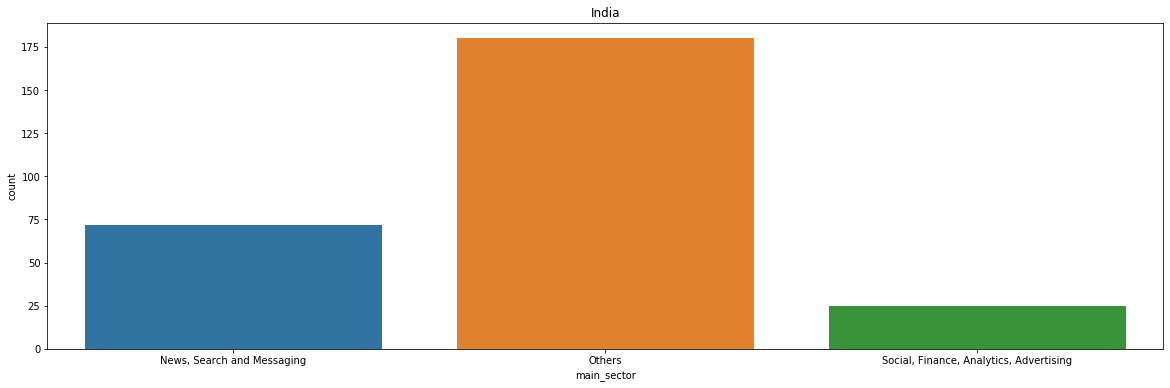

In [107]:
usa_top3_sectors = ['Others', 'Cleantech / Semiconductors', 'Social, Finance, Analytics, Advertising']
plot3_df = final_master_frame.loc[(final_master_frame.funding_round_type == 'venture') & 
                                  (final_master_frame.country_code == 'USA') &
                                  final_master_frame['main_sector'].isin(usa_top3_sectors), :]
#plt.subplot(1, 3, 1)
plt.figure(figsize=(20, 6))
sns.countplot(x="main_sector", data=plot3_df)
plt.title("USA")


#plt.subplot(1, 3, 2)
gbr_top3_sectors = ['Others', 'News, Search and Messaging', 'Social, Finance, Analytics, Advertising']
plot4_df = final_master_frame.loc[(final_master_frame.funding_round_type == 'venture') & 
                                  (final_master_frame.country_code == 'GBR') &
                                  final_master_frame['main_sector'].isin(gbr_top3_sectors), :]
plt.figure(figsize=(20, 6))
sns.countplot(x="main_sector", data=plot4_df)
plt.title("Great Britain")


#plt.subplot(1, 3, 3)
india_top3_sectors = ['Others', 'News, Search and Messaging', 'Social, Finance, Analytics, Advertising']
plot5_df = final_master_frame.loc[(final_master_frame.funding_round_type == 'venture') & 
                                  (final_master_frame.country_code == 'IND') &
                                  final_master_frame['main_sector'].isin(india_top3_sectors), :]
plt.figure(figsize=(20, 6))
sns.countplot(x="main_sector", data=plot5_df)
plt.title("India")


plt.show()